In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

import sys
import os
sys.path.append('../../../scripts/')
import data_cleaning

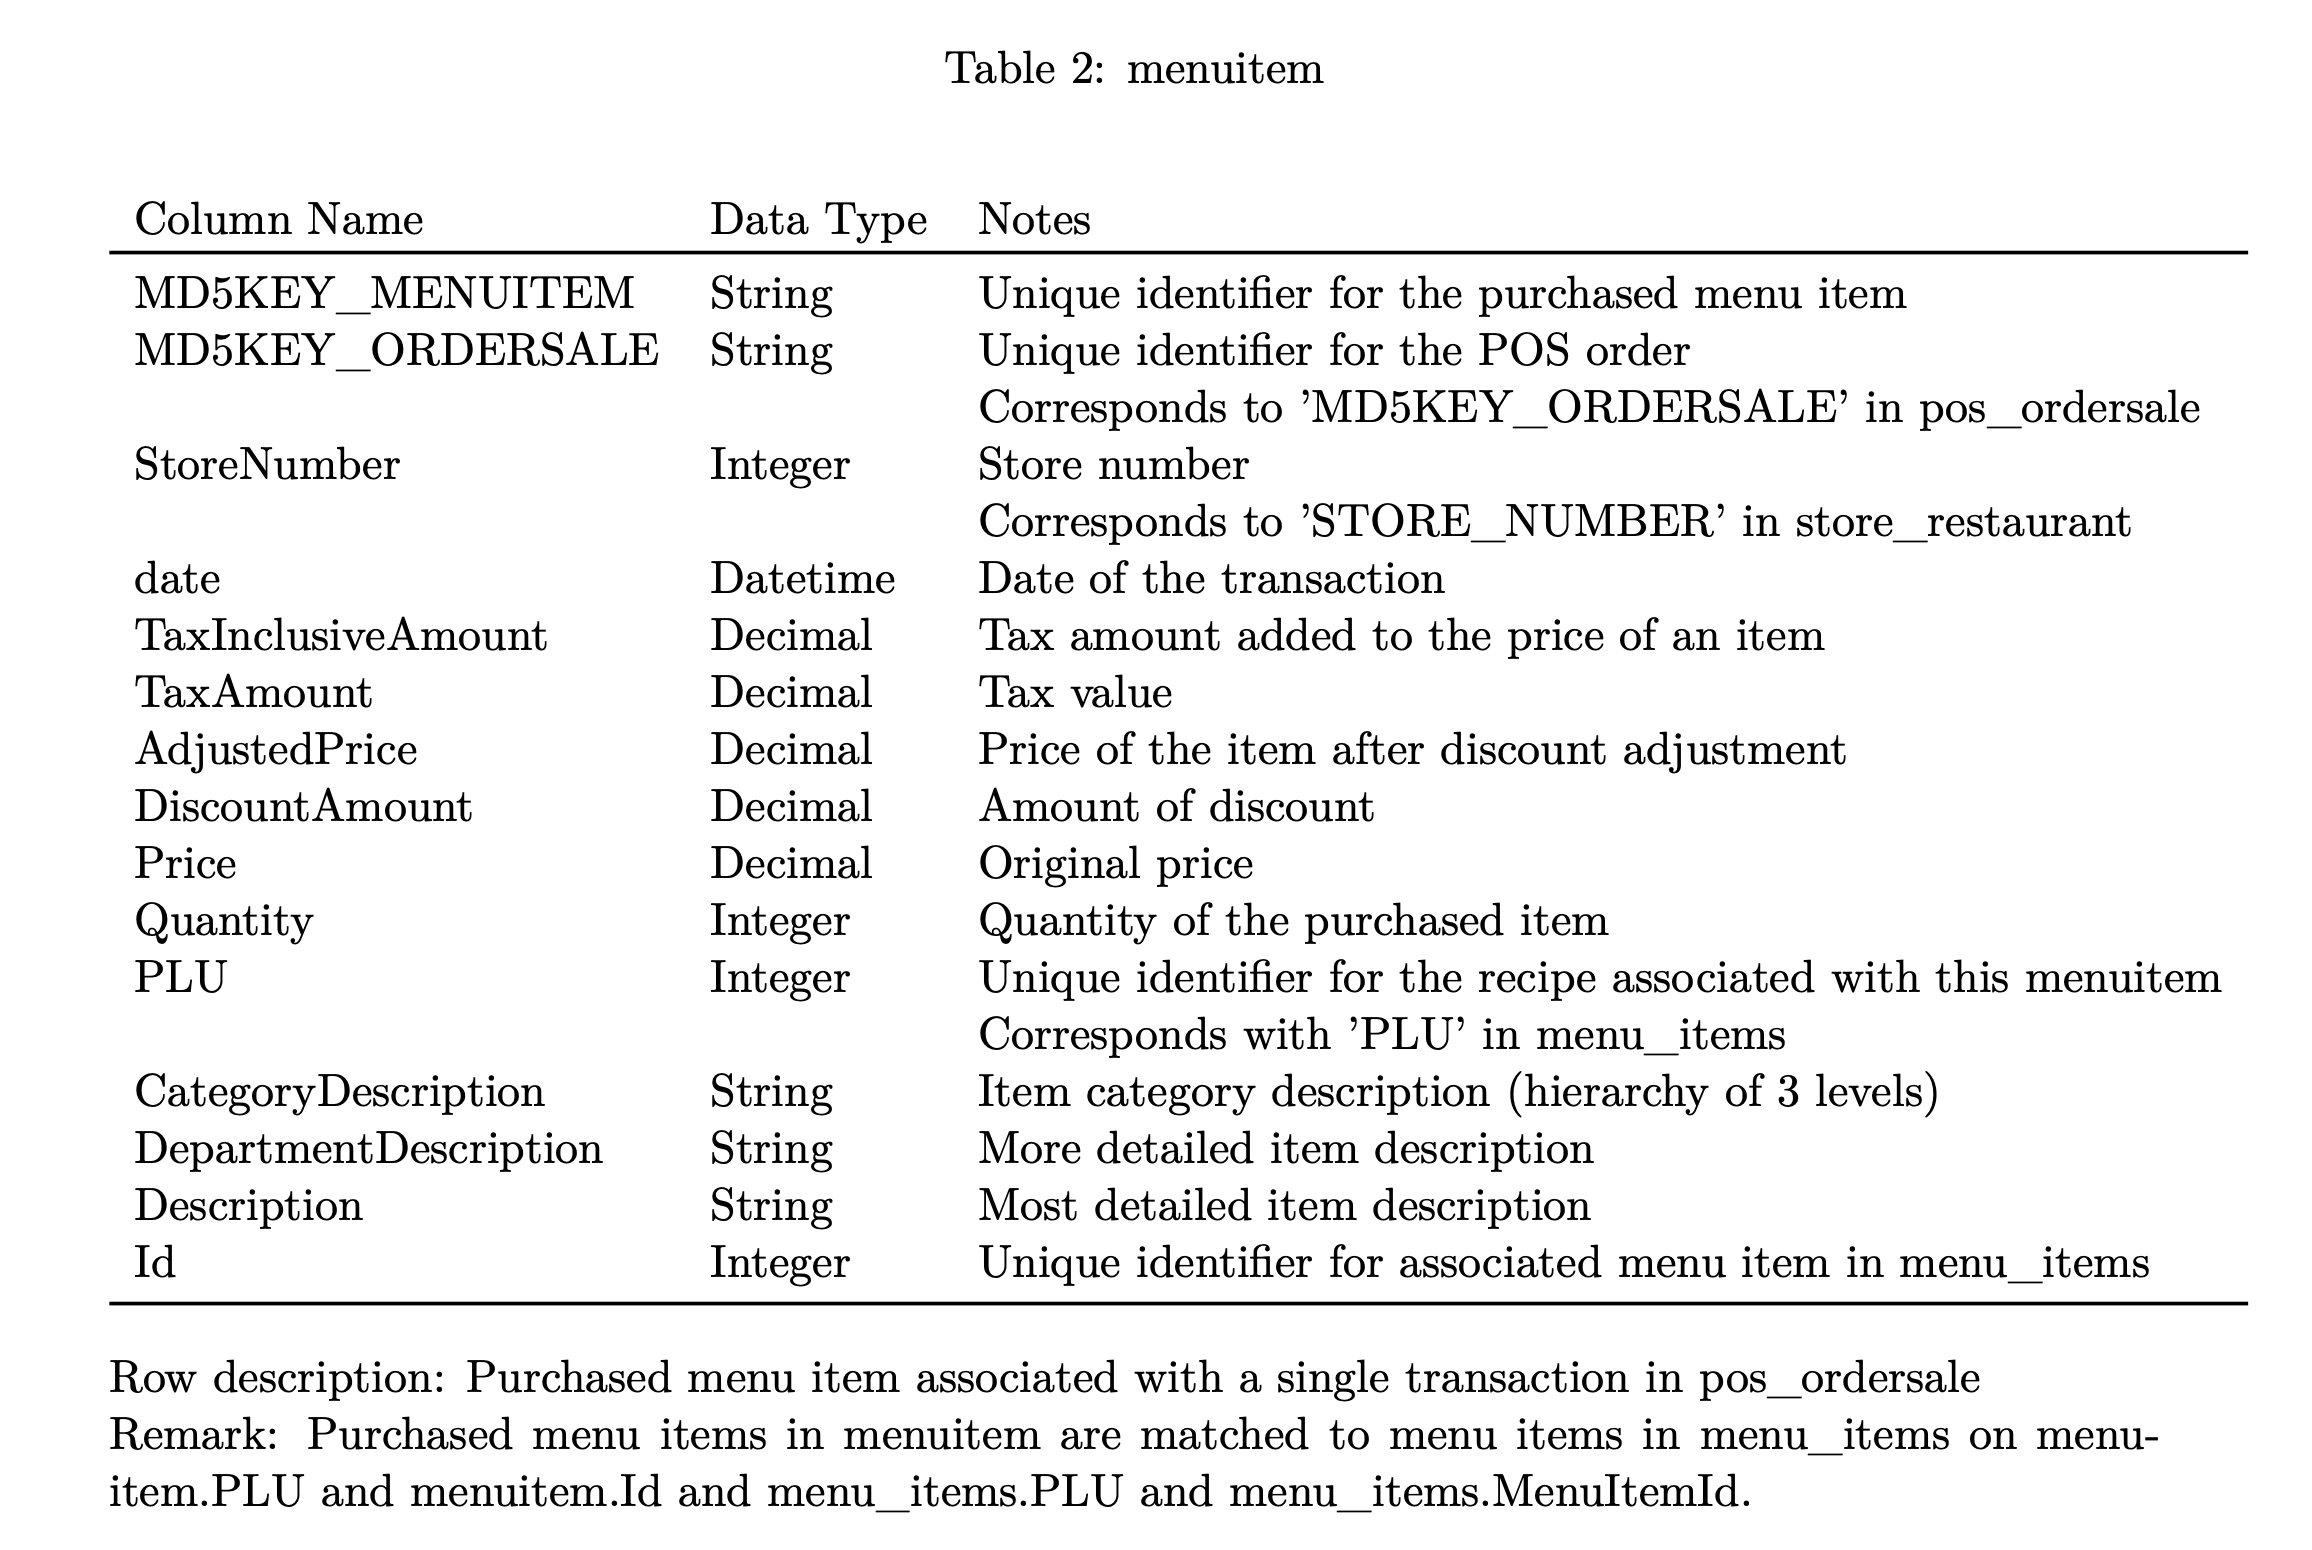

In [3]:
df = pd.read_csv('../../../data/raw/menuitem.csv')

In [4]:
df.head()

,MD5KEY_MENUITEM,MD5KEY_ORDERSALE,CategoryDescription,DepartmentDescription,Description,StoreNumber,TaxInclusiveAmount,TaxAmount,AdjustedPrice,DiscountAmount,Price,Quantity,PLU,Id,date
0,001E0224E4EDA63D6FED96D59E0C1E76,072D3B76BE58E4553A373AF3206D2CA5,Footlong,Footlong Sub,Chickn Strips FtLong,46673,0,0.6975,7.75,0.00,7.75,1,111000041,326,15-03-05
1,003E4E20196B2F5BDD33CE06D2943EF4,14811D4F3458058007B0B6908C2DA393,Fountain,Fountain Drink 21 oz.,21oz Fountain Drink,46673,0,0.1530,1.70,0.00,1.70,1,212000126,280,15-03-05
2,012A55E5551C95A559A7B074AE85117E,22FA6C39B7A15ABB6EB568E66A6B30E1,6 Inch,6 Inch Sub,B.M.T. 6 inch,12631,0,0.3230,3.64,0.61,4.25,1,121000008,8,15-03-05
3,01B07F1C6DC6945796571FC78735DA16,915B69612845BBD974C39AC105F5CA8C,6 Inch,6 Inch Sub,Veggie Delite 6 inch,12631,0,0.3328,3.75,0.00,3.75,1,121000001,91,15-03-05
4,02DE19974DE5304BF243A1C2EC639495,CD6386C802450EDCF13A3D112D1F86EC,Add On,Add On 6in Portion,Avocado Add6in,12631,0,0.0443,0.50,0.00,0.50,1,175000062,564,15-03-05


In [5]:
df['MD5KEY_ORDERSALE'].nunique()

40622

In [6]:
# Chuyển đổi kiểu dữ liệu date 
df['date'] = pd.to_datetime(df['date'], format='%y-%m-%d')

# 1. Check và xử lý kiểu dữ liệu

## Kiểm tra

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91431 entries, 0 to 91430
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   MD5KEY_MENUITEM        91431 non-null  object        
 1   MD5KEY_ORDERSALE       91431 non-null  object        
 2   CategoryDescription    91431 non-null  object        
 3   DepartmentDescription  91431 non-null  object        
 4   Description            91431 non-null  object        
 5   StoreNumber            91431 non-null  int64         
 6   TaxInclusiveAmount     91431 non-null  int64         
 7   TaxAmount              91431 non-null  float64       
 8   AdjustedPrice          91431 non-null  float64       
 9   DiscountAmount         91431 non-null  float64       
 10  Price                  91431 non-null  float64       
 11  Quantity               91431 non-null  int64         
 12  PLU                    91431 non-null  int64         
 13  I

## Xử lý
- date chuyển đổi kiểu dữ liệu object sang datetime

In [8]:
# Convert the date column to the datetime data type
df['date'] = pd.to_datetime(df['date'], format='%y-%m-%d')

In [9]:
df.head()

,MD5KEY_MENUITEM,MD5KEY_ORDERSALE,CategoryDescription,DepartmentDescription,Description,StoreNumber,TaxInclusiveAmount,TaxAmount,AdjustedPrice,DiscountAmount,Price,Quantity,PLU,Id,date
0,001E0224E4EDA63D6FED96D59E0C1E76,072D3B76BE58E4553A373AF3206D2CA5,Footlong,Footlong Sub,Chickn Strips FtLong,46673,0,0.6975,7.75,0.00,7.75,1,111000041,326,2015-03-05
1,003E4E20196B2F5BDD33CE06D2943EF4,14811D4F3458058007B0B6908C2DA393,Fountain,Fountain Drink 21 oz.,21oz Fountain Drink,46673,0,0.1530,1.70,0.00,1.70,1,212000126,280,2015-03-05
2,012A55E5551C95A559A7B074AE85117E,22FA6C39B7A15ABB6EB568E66A6B30E1,6 Inch,6 Inch Sub,B.M.T. 6 inch,12631,0,0.3230,3.64,0.61,4.25,1,121000008,8,2015-03-05
3,01B07F1C6DC6945796571FC78735DA16,915B69612845BBD974C39AC105F5CA8C,6 Inch,6 Inch Sub,Veggie Delite 6 inch,12631,0,0.3328,3.75,0.00,3.75,1,121000001,91,2015-03-05
4,02DE19974DE5304BF243A1C2EC639495,CD6386C802450EDCF13A3D112D1F86EC,Add On,Add On 6in Portion,Avocado Add6in,12631,0,0.0443,0.50,0.00,0.50,1,175000062,564,2015-03-05


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91431 entries, 0 to 91430
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   MD5KEY_MENUITEM        91431 non-null  object        
 1   MD5KEY_ORDERSALE       91431 non-null  object        
 2   CategoryDescription    91431 non-null  object        
 3   DepartmentDescription  91431 non-null  object        
 4   Description            91431 non-null  object        
 5   StoreNumber            91431 non-null  int64         
 6   TaxInclusiveAmount     91431 non-null  int64         
 7   TaxAmount              91431 non-null  float64       
 8   AdjustedPrice          91431 non-null  float64       
 9   DiscountAmount         91431 non-null  float64       
 10  Price                  91431 non-null  float64       
 11  Quantity               91431 non-null  int64         
 12  PLU                    91431 non-null  int64         
 13  I

# 2. Kiểm tra và xử lý khoảng trắng

## Kiểm tra

In [11]:
df.select_dtypes(include="object")

,MD5KEY_MENUITEM,MD5KEY_ORDERSALE,CategoryDescription,DepartmentDescription,Description
0,001E0224E4EDA63D6FED96D59E0C1E76,072D3B76BE58E4553A373AF3206D2CA5,Footlong,Footlong Sub,Chickn Strips FtLong
1,003E4E20196B2F5BDD33CE06D2943EF4,14811D4F3458058007B0B6908C2DA393,Fountain,Fountain Drink 21 oz.,21oz Fountain Drink
2,012A55E5551C95A559A7B074AE85117E,22FA6C39B7A15ABB6EB568E66A6B30E1,6 Inch,6 Inch Sub,B.M.T. 6 inch
3,01B07F1C6DC6945796571FC78735DA16,915B69612845BBD974C39AC105F5CA8C,6 Inch,6 Inch Sub,Veggie Delite 6 inch
4,02DE19974DE5304BF243A1C2EC639495,CD6386C802450EDCF13A3D112D1F86EC,Add On,Add On 6in Portion,Avocado Add6in
...,...,...,...,...,...
91426,FF8D9C582D9D56B98033132538E0020A,C1FC597609722C265C130E692875AF96,Chips,Chips,Chips
91427,FFAA204DCDF43F43ADF7BD6AFCFEAC7A,6328756C8846E3534E92659812D54C64,6 Inch,6 Inch Sub,Cold Cut Combo 6 inch
91428,FFAD36E06711249D447DCD96121F21CC,32A10A584840FC7DBED1818459A24919,Footlong,Footlong Sub,Cold Cut Combo FtLong
91429,FFD5DCAFF2286B45901E4EA8F1928646,D56C9748DFA6D3672EAB8AFA1B9E17AE,Footlong,Footlong Sub,Spicy Italian FtLong


In [12]:

df['CategoryDescription'].str.contains(r'^\s+|\s+$').sum()

82679

In [13]:
df.shape

(91431, 15)

## Xử lý

In [14]:
df = data_cleaning.remove_whitespace(df)

In [15]:
df['CategoryDescription'].str.contains(r'^\s+|\s+$').sum()

0

# 3. Kiểm tra xử lý giá trị thiếu

## Kiểm tra

In [16]:
df.isna().sum()

MD5KEY_MENUITEM          0
MD5KEY_ORDERSALE         0
CategoryDescription      0
DepartmentDescription    0
Description              0
StoreNumber              0
TaxInclusiveAmount       0
TaxAmount                0
AdjustedPrice            0
DiscountAmount           0
Price                    0
Quantity                 0
PLU                      0
Id                       0
date                     0
dtype: int64

# 4. Kiểm tra và loại bỏ giá trị trùng lặp

## Kiểm tra

In [17]:
df.duplicated().sum()

0

# 5. Thêm - Tạo thêm trường SalesAmount, day_of_week
- Data chưa có cột SalesAmount, tạo thêm để phân tích doanh thu -> Giá sau trừ giảm giá * số lượng
- Tạo thêm trường day_of_week để phân tích ngày có doanh thu tốt và kém trong tuần


In [18]:
# AdjustedPrice có một số giá trị bị lỗi khi AdjustedPrice cao hơn Price mà chưa tìm được nguyên nhân nên không sử dụng
# df['SalesAmount'] = df['AdjustedPrice'] * df['Quantity']

# Thay đổi lại công thức SalesAmount = (Price * Quantity) - DiscountAmount
df['SalesAmount'] = (df['Price'] * df['Quantity']) - df['DiscountAmount']
df['day_of_week'] = df['date'].dt.day_name()

In [19]:
df.head()

,MD5KEY_MENUITEM,MD5KEY_ORDERSALE,CategoryDescription,DepartmentDescription,Description,StoreNumber,TaxInclusiveAmount,TaxAmount,AdjustedPrice,DiscountAmount,Price,Quantity,PLU,Id,date,SalesAmount,day_of_week
0,001E0224E4EDA63D6FED96D59E0C1E76,072D3B76BE58E4553A373AF3206D2CA5,Footlong,Footlong Sub,Chickn Strips FtLong,46673,0,0.6975,7.75,0.00,7.75,1,111000041,326,2015-03-05,7.75,Thursday
1,003E4E20196B2F5BDD33CE06D2943EF4,14811D4F3458058007B0B6908C2DA393,Fountain,Fountain Drink 21 oz.,21oz Fountain Drink,46673,0,0.1530,1.70,0.00,1.70,1,212000126,280,2015-03-05,1.70,Thursday
2,012A55E5551C95A559A7B074AE85117E,22FA6C39B7A15ABB6EB568E66A6B30E1,6 Inch,6 Inch Sub,B.M.T. 6 inch,12631,0,0.3230,3.64,0.61,4.25,1,121000008,8,2015-03-05,3.64,Thursday
3,01B07F1C6DC6945796571FC78735DA16,915B69612845BBD974C39AC105F5CA8C,6 Inch,6 Inch Sub,Veggie Delite 6 inch,12631,0,0.3328,3.75,0.00,3.75,1,121000001,91,2015-03-05,3.75,Thursday
4,02DE19974DE5304BF243A1C2EC639495,CD6386C802450EDCF13A3D112D1F86EC,Add On,Add On 6in Portion,Avocado Add6in,12631,0,0.0443,0.50,0.00,0.50,1,175000062,564,2015-03-05,0.50,Thursday


In [20]:
# df[(df['Quantity'] >= 2) & (df['DiscountAmount'] > 0)].head()

## 5.1 Thêm cột DiscountPercentage
Giảm giá ch mỗi món

In [68]:
df['DiscountPercentage'] = (df['DiscountAmount'] / df['Price']) * 100

In [70]:
df[(df['Quantity'] >= 2) & (df['DiscountAmount'] > 0)].head()

,MD5KEY_MENUITEM,MD5KEY_ORDERSALE,CategoryDescription,DepartmentDescription,Description,StoreNumber,TaxAmount,AdjustedPrice,DiscountAmount,Price,Quantity,PLU,Id,date,SalesAmount,day_of_week,DiscountPercentage
21,0F6FFB2FFF998154C8E31F270012FF0A,04BBFAD4E73C30EE2EC3B4E52509637C,Cookies,Cookies,Cookie,12631,0.0923,1.04,0.06,0.55,2,321000101,276,2015-03-05,1.04,Thursday,10.909091
34,16D2797E3641956A536DF6A3464EC617,CA1E0F0A3FD52C8354478B98C6DEC50E,Cookies,Cookies,Cookie,12631,0.1038,1.17,0.03,0.60,2,321000101,276,2015-03-05,1.17,Thursday,5.000000
50,1D0E9C4C1D4E04FBAF997AEDE75BF44C,6CA2772B8CA7150F7999D055DF8FF5AE,Fountain,Fountain Drink 21 oz.,21oz Fountain Drink,12631,0.2201,2.48,0.52,1.50,2,212000126,280,2015-03-05,2.48,Thursday,34.666667
56,1FA82E8B8EBD489C1F925C6985BE89C9,5FBB45C83BAED01D3D73608891F146E9,Cookies,Cookies,Cookie,12631,0.0967,1.09,0.01,0.55,2,321000101,276,2015-03-05,1.09,Thursday,1.818182
76,282905C271EF8EB7F1F9A713C0D78D3E,18C5845A314FA6935FC937F40F4B7FF8,Cookies,Cookies,Cookie,12631,0.0869,0.98,0.12,0.55,2,321000101,276,2015-03-05,0.98,Thursday,21.818182


In [71]:
df[df['MD5KEY_MENUITEM'] == '0F6FFB2FFF998154C8E31F270012FF0A']

,MD5KEY_MENUITEM,MD5KEY_ORDERSALE,CategoryDescription,DepartmentDescription,Description,StoreNumber,TaxAmount,AdjustedPrice,DiscountAmount,Price,Quantity,PLU,Id,date,SalesAmount,day_of_week,DiscountPercentage
21,0F6FFB2FFF998154C8E31F270012FF0A,04BBFAD4E73C30EE2EC3B4E52509637C,Cookies,Cookies,Cookie,12631,0.0923,1.04,0.06,0.55,2,321000101,276,2015-03-05,1.04,Thursday,10.909091


In [22]:
df['day_of_week'].value_counts()

day_of_week
Monday       14371
Sunday       14265
Wednesday    14254
Thursday     14131
Tuesday      13678
Friday       11569
Saturday      9163
Name: count, dtype: int64

# 6. Xoá các trường không có giá trị
TaxInclusiveAmount: tất cả giá trị bằng 0, không có giá trị hỗ trợ khi phân tích

In [23]:
df = df.drop(columns="TaxInclusiveAmount")

In [24]:
df.columns

Index(['MD5KEY_MENUITEM', 'MD5KEY_ORDERSALE', 'CategoryDescription',
       'DepartmentDescription', 'Description', 'StoreNumber', 'TaxAmount',
       'AdjustedPrice', 'DiscountAmount', 'Price', 'Quantity', 'PLU', 'Id',
       'date', 'SalesAmount', 'day_of_week'],
      dtype='object')

# 7. Kiểm tra và xử lý giá trị ngoại lai

## Kiểm tra tổng quan

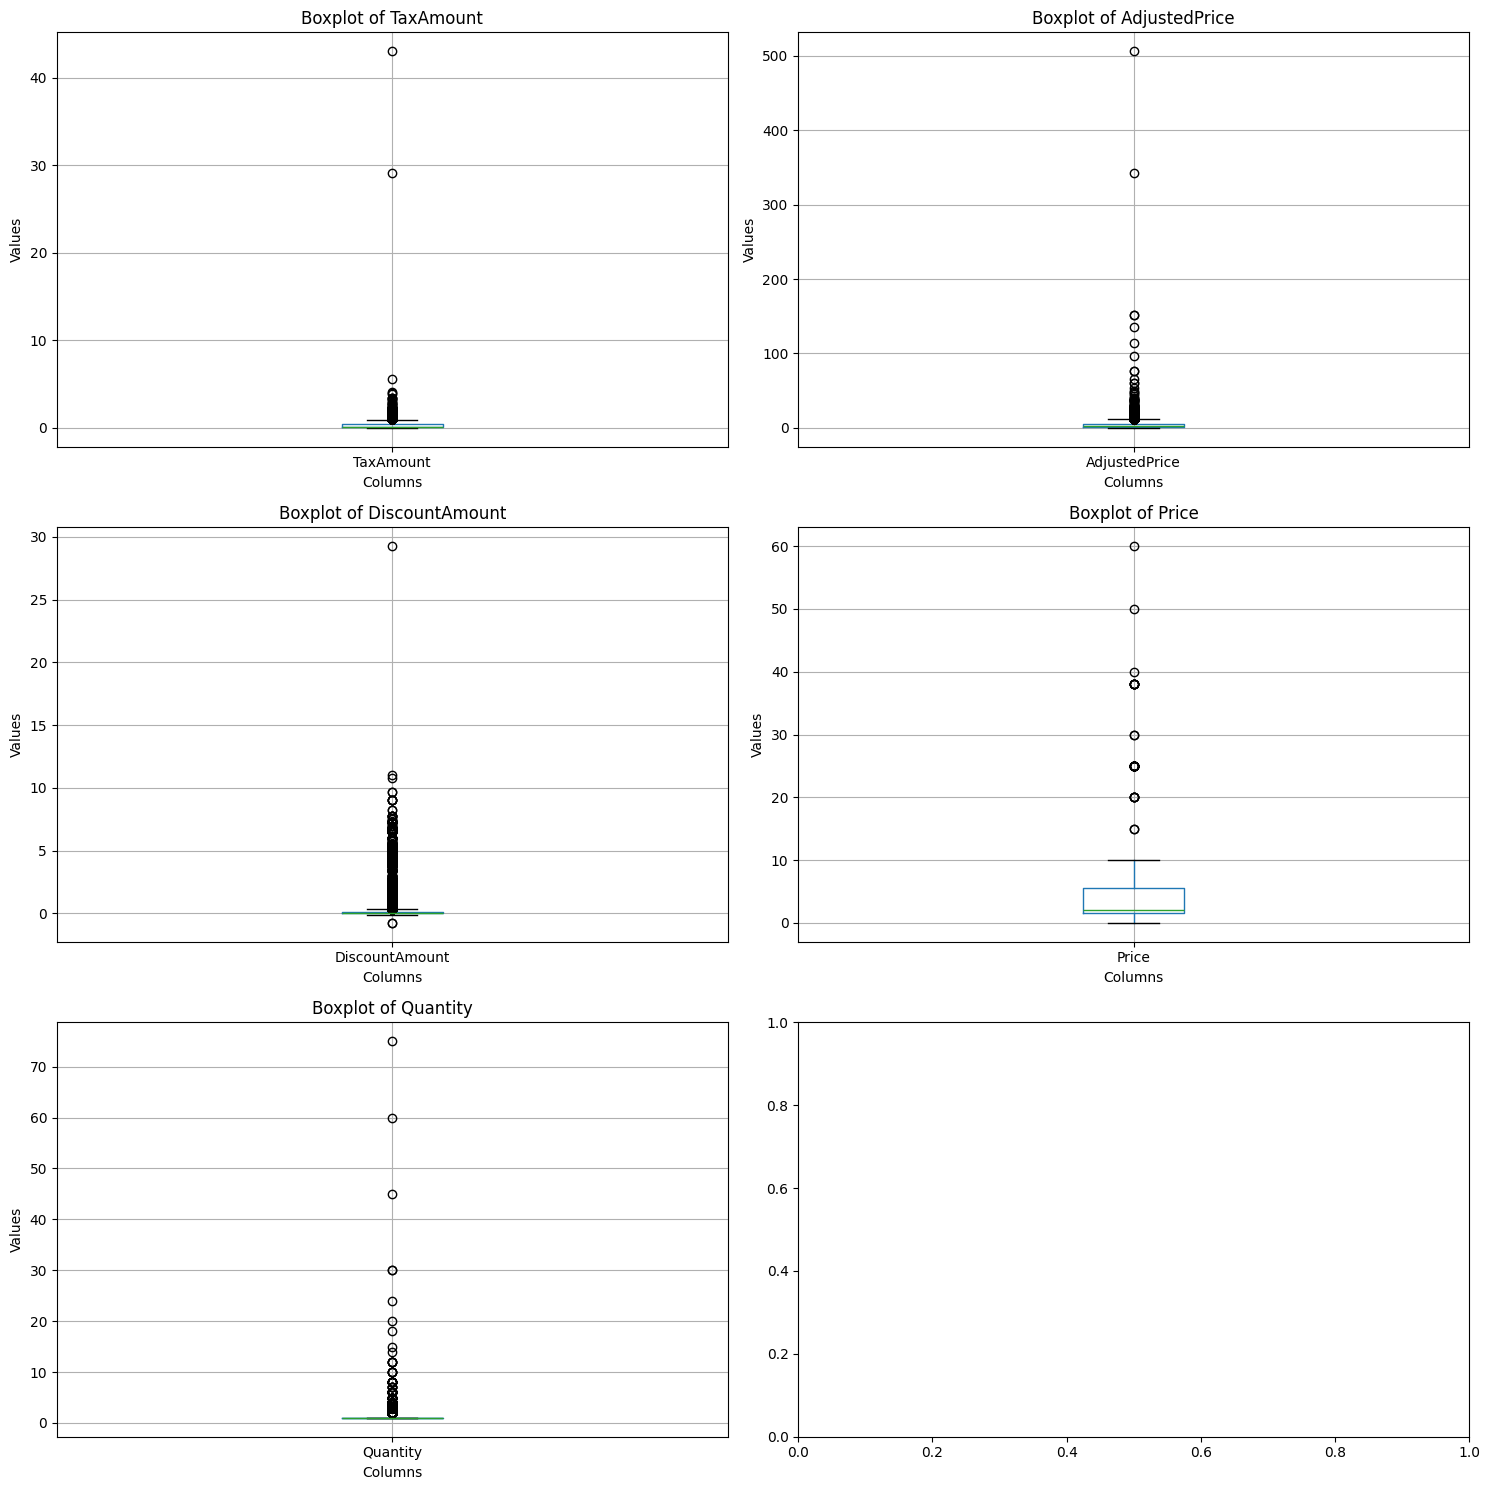

In [25]:
df_boxplt = df[['TaxAmount', 'AdjustedPrice', 'DiscountAmount', 'Price', 'Quantity']]

# Tạo figure và các axes con với 3 hàng và 2 cột
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Vẽ từng boxplot vào từng subplot riêng biệt
for ax, column in zip(axes, df_boxplt):
    df.boxplot(column=column, ax=ax)
    ax.set_title(f'Boxplot of {column}')
    ax.set_xlabel('Columns')
    ax.set_ylabel('Values')

# Ẩn các subplot không sử dụng nếu có
for i in range(len(df_boxplt), len(axes)):
    fig.delaxes(axes[i])

# Tối ưu khoảng cách giữa các subplot
plt.tight_layout()
plt.show()

In [26]:
df.select_dtypes(include='number').describe()

,StoreNumber,TaxAmount,AdjustedPrice,DiscountAmount,Price,Quantity,PLU,Id,SalesAmount
count,91431.000000,91431.000000,91431.000000,91431.000000,91431.000000,91431.000000,9.143100e+04,91431.000000,91431.000000
mean,18152.995319,0.263194,3.464881,0.200753,3.473435,1.092102,1.889488e+08,371.846048,3.464881
std,14823.097615,0.291208,3.511239,0.672092,2.444280,0.534937,8.030443e+07,1078.178157,3.511239
min,4904.000000,0.000000,0.000000,-0.750000,0.000000,1.000000,1.110000e+08,1.000000,0.000000
25%,4904.000000,0.094900,1.270000,0.000000,1.500000,1.000000,1.120000e+08,64.000000,1.270000
50%,12631.000000,0.150700,2.100000,0.000000,2.100000,1.000000,1.740000e+08,276.000000,2.100000
75%,20974.000000,0.444700,5.500000,0.130000,5.500000,1.000000,2.210001e+08,280.000000,5.500000
max,46673.000000,43.031200,506.250000,29.250000,60.000000,75.000000,4.110002e+08,10067.000000,506.250000


## Kiểm tra và xử lý sản phẩm giá bằng 0

### Kiểm tra

In [27]:
df[df['Price'] == 0]

,MD5KEY_MENUITEM,MD5KEY_ORDERSALE,CategoryDescription,DepartmentDescription,Description,StoreNumber,TaxAmount,AdjustedPrice,DiscountAmount,Price,Quantity,PLU,Id,date,SalesAmount,day_of_week
5878,2FC3289E8B0FC19A65582C7E80604BD0,3E934D88D60D22BF956CBCF9281513E8,Hot Beverage,Hot Beverage 12 oz.,12oz Coffee,4904,0.0,0.0,0.0,0.0,1,231000111,613,2015-03-17,0.0,Tuesday


In [28]:
df.shape

(91431, 16)

In [29]:
df.select_dtypes(include='number').describe()

,StoreNumber,TaxAmount,AdjustedPrice,DiscountAmount,Price,Quantity,PLU,Id,SalesAmount
count,91431.000000,91431.000000,91431.000000,91431.000000,91431.000000,91431.000000,9.143100e+04,91431.000000,91431.000000
mean,18152.995319,0.263194,3.464881,0.200753,3.473435,1.092102,1.889488e+08,371.846048,3.464881
std,14823.097615,0.291208,3.511239,0.672092,2.444280,0.534937,8.030443e+07,1078.178157,3.511239
min,4904.000000,0.000000,0.000000,-0.750000,0.000000,1.000000,1.110000e+08,1.000000,0.000000
25%,4904.000000,0.094900,1.270000,0.000000,1.500000,1.000000,1.120000e+08,64.000000,1.270000
50%,12631.000000,0.150700,2.100000,0.000000,2.100000,1.000000,1.740000e+08,276.000000,2.100000
75%,20974.000000,0.444700,5.500000,0.130000,5.500000,1.000000,2.210001e+08,280.000000,5.500000
max,46673.000000,43.031200,506.250000,29.250000,60.000000,75.000000,4.110002e+08,10067.000000,506.250000


In [30]:
df[df['AdjustedPrice'] == 0]

,MD5KEY_MENUITEM,MD5KEY_ORDERSALE,CategoryDescription,DepartmentDescription,Description,StoreNumber,TaxAmount,AdjustedPrice,DiscountAmount,Price,Quantity,PLU,Id,date,SalesAmount,day_of_week
35,16EF75E36495C66CCC86A0A156C79C2F,2153ABB98FA1E8BF9B4939C0B01D59D0,Cookies,Cookies,Cookie,12631,0.0,0.0,0.60,0.60,1,321000101,276,2015-03-05,0.0,Thursday
72,26DE03952905774B80F554AC09922E77,F844771B528B904CF6D595EC9106BCAD,Footlong,Footlong Sub,Turkey FtLong,12631,0.0,0.0,6.50,6.50,1,111000012,12,2015-03-05,0.0,Thursday
234,8EE236ECC7F3F40BFC1BF5E182821230,C051C2C48CB7799D5E86FE2EFA296612,Footlong,Footlong Sub,Steak & Chse FtLong,12631,0.0,0.0,7.25,7.25,1,111000050,85,2015-03-05,0.0,Thursday
322,CB8A3434B0C80C6E7A86FF19D6E546F7,2153ABB98FA1E8BF9B4939C0B01D59D0,6 Inch,6 Inch Sub,Steak & Chse 6 inch,12631,0.0,0.0,4.50,4.50,1,121000050,86,2015-03-05,0.0,Thursday
493,4C01362FAE853002658ACDF935BFEC34,7E9638C65F732FD121D72B58367C3069,Cookies,Cookies,Cookie,12631,0.0,0.0,0.55,0.55,1,321000101,276,2015-03-06,0.0,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90765,5EAA15F8C1E5A8D0C2F9D107C7116FE3,A2994A0BECCD0440BC194FFB258D4CBD,6 Inch,6 Inch Sub,Chicken Parm 6 inch,20974,0.0,0.0,4.50,4.50,1,121000073,107,2015-06-15,0.0,Monday
91035,9B1B977D3A818333AA03C9B5FF4ECBA0,5059840AF45104406D15E97E825927C9,Footlong,Footlong Sub,Turkey FtLong,20974,0.0,0.0,6.75,6.75,1,111000012,12,2015-06-15,0.0,Monday
91105,AB63CC56211C6003DADE1AFC12C9AEB0,F31FDE7562CAE97FC177208C5594ABFE,Footlong,Footlong Sub,Meatball FtLong,12631,0.0,0.0,5.50,5.50,1,111000003,58,2015-06-15,0.0,Monday
91213,CA133BE10079232FD9E60084E6436093,54BE7198AE17A23E983F06B6B0F5332A,Cookies,Cookies,Cookie,20974,0.0,0.0,1.30,0.65,2,321000101,276,2015-06-15,0.0,Monday


### Xử lý
Chỉ có 1 giá trị duy nhất có thể loại bỏ

In [31]:
df = df[df['Price'] != 0]

In [32]:
df[df['Price'] == 0]

,MD5KEY_MENUITEM,MD5KEY_ORDERSALE,CategoryDescription,DepartmentDescription,Description,StoreNumber,TaxAmount,AdjustedPrice,DiscountAmount,Price,Quantity,PLU,Id,date,SalesAmount,day_of_week


In [33]:
df.shape

(91430, 16)

## Check describe sau khi loại bỏ giá bằng 0

In [34]:
df.select_dtypes(include='number').describe()

,StoreNumber,TaxAmount,AdjustedPrice,DiscountAmount,Price,Quantity,PLU,Id,SalesAmount
count,91430.000000,91430.000000,91430.000000,91430.000000,91430.000000,91430.000000,9.143000e+04,91430.000000,91430.000000
mean,18153.140227,0.263197,3.464919,0.200755,3.473473,1.092103,1.889484e+08,371.843410,3.464919
std,14823.113917,0.291208,3.511240,0.672095,2.444266,0.534940,8.030474e+07,1078.183758,3.511240
min,4904.000000,0.000000,0.000000,-0.750000,0.050000,1.000000,1.110000e+08,1.000000,0.000000
25%,4904.000000,0.094900,1.270000,0.000000,1.500000,1.000000,1.120000e+08,64.000000,1.270000
50%,12631.000000,0.150700,2.100000,0.000000,2.100000,1.000000,1.740000e+08,276.000000,2.100000
75%,20974.000000,0.444700,5.500000,0.130000,5.500000,1.000000,2.210001e+08,280.000000,5.500000
max,46673.000000,43.031200,506.250000,29.250000,60.000000,75.000000,4.110002e+08,10067.000000,506.250000


## Kiểm tra và xử lý giá trị DiscountAmount nhỏ hơn 0

In [35]:
df[df['DiscountAmount'] < 0]

,MD5KEY_MENUITEM,MD5KEY_ORDERSALE,CategoryDescription,DepartmentDescription,Description,StoreNumber,TaxAmount,AdjustedPrice,DiscountAmount,Price,Quantity,PLU,Id,date,SalesAmount,day_of_week
29001,8FA09DB7FC32F8750837DEA594370380,76CBDD389138090A663E9EB6F0ABDDE5,Salad,Salad,Rst Chicken Salad,12631,0.0,6.75,-0.75,6.00,1,131000010,84,2015-04-11,6.75,Saturday
29895,981F33755CB678F17666ACDF270B412E,DE1246BF214A32B3313E6DAE0CE83D81,Add On,Add On 6in Portion,Avocado Add6in,20974,0.0,1.50,-0.75,0.75,1,175000062,564,2015-04-12,1.50,Sunday
43444,29D0F917171EFEFEB21A3B24EA39AE05,3077EDDE25423D35500F3DF3B94CEA8A,Bottled Beverage,Bottled Drink,Bottled Water,12631,0.0,1.61,-0.11,1.50,1,221000134,365,2015-04-26,1.61,Sunday
43798,75846AE40A08A375822FD19395A95864,3077EDDE25423D35500F3DF3B94CEA8A,Chips,Chips,Chips,12631,0.0,1.14,-0.04,1.10,1,311000100,277,2015-04-26,1.14,Sunday
57603,37184C5872A9C0DF748AD2DADE740B46,57AFC6796BA512A3C2C079BBD5AFF365,Bottled Beverage,Bottled Drink,Bottled Water,12631,0.0,1.61,-0.11,1.50,1,221000134,365,2015-05-10,1.61,Sunday
57856,6C76A7741CEE1840FC52198B8DF76242,57AFC6796BA512A3C2C079BBD5AFF365,Chips,Chips,Chips,12631,0.0,1.14,-0.04,1.10,1,311000100,277,2015-05-10,1.14,Sunday
66558,A4A0DCCB0E93E31A1BFE0246B5A11EA3,F475A5C8875E68C5BBC59A2F4FBC17EC,Chips,Chips,Chips,12631,0.0,1.14,-0.04,1.10,1,311000100,277,2015-05-19,1.14,Tuesday
69966,A0318DE9050D11A5A42016BA2328C384,4DDE9500CAE6D857B2E3F2BF1D3CBE18,Chips,Chips,Chips,12631,0.0,1.14,-0.04,1.10,1,311000100,277,2015-05-23,1.14,Saturday
70006,AEABCC9226510356E1A5FA6C96050D12,4DDE9500CAE6D857B2E3F2BF1D3CBE18,Bottled Beverage,Bottled Drink,Bottled Water,12631,0.0,1.56,-0.06,1.50,1,221000134,365,2015-05-23,1.56,Saturday
91164,B972812807235523EAEE771C60B2D55C,8724FDCD199FBD4216089677E7789C02,Chips,Chips,Chips,12631,0.0,1.14,-0.04,1.10,1,311000100,277,2015-06-15,1.14,Monday


### Kiểm tra

In [36]:
# Check số lượng Discount nhỏ hơn 0
df[df['DiscountAmount'] < 0]['DiscountAmount'].count()

10

In [37]:
# Thông tin tổng quan các Discount âm
df[df['DiscountAmount'] < 0].head()

,MD5KEY_MENUITEM,MD5KEY_ORDERSALE,CategoryDescription,DepartmentDescription,Description,StoreNumber,TaxAmount,AdjustedPrice,DiscountAmount,Price,Quantity,PLU,Id,date,SalesAmount,day_of_week
29001,8FA09DB7FC32F8750837DEA594370380,76CBDD389138090A663E9EB6F0ABDDE5,Salad,Salad,Rst Chicken Salad,12631,0.0,6.75,-0.75,6.00,1,131000010,84,2015-04-11,6.75,Saturday
29895,981F33755CB678F17666ACDF270B412E,DE1246BF214A32B3313E6DAE0CE83D81,Add On,Add On 6in Portion,Avocado Add6in,20974,0.0,1.50,-0.75,0.75,1,175000062,564,2015-04-12,1.50,Sunday
43444,29D0F917171EFEFEB21A3B24EA39AE05,3077EDDE25423D35500F3DF3B94CEA8A,Bottled Beverage,Bottled Drink,Bottled Water,12631,0.0,1.61,-0.11,1.50,1,221000134,365,2015-04-26,1.61,Sunday
43798,75846AE40A08A375822FD19395A95864,3077EDDE25423D35500F3DF3B94CEA8A,Chips,Chips,Chips,12631,0.0,1.14,-0.04,1.10,1,311000100,277,2015-04-26,1.14,Sunday
57603,37184C5872A9C0DF748AD2DADE740B46,57AFC6796BA512A3C2C079BBD5AFF365,Bottled Beverage,Bottled Drink,Bottled Water,12631,0.0,1.61,-0.11,1.50,1,221000134,365,2015-05-10,1.61,Sunday


In [38]:
# Check xem có phải cùng 1 order hay không
df[df['DiscountAmount'] < 0]['MD5KEY_ORDERSALE'].unique()

array(['76CBDD389138090A663E9EB6F0ABDDE5',
       'DE1246BF214A32B3313E6DAE0CE83D81',
       '3077EDDE25423D35500F3DF3B94CEA8A',
       '57AFC6796BA512A3C2C079BBD5AFF365',
       'F475A5C8875E68C5BBC59A2F4FBC17EC',
       '4DDE9500CAE6D857B2E3F2BF1D3CBE18',
       '8724FDCD199FBD4216089677E7789C02'], dtype=object)

### Kiểm tra bảng liên quan ordersale

In [39]:
df_order = pd.read_csv('../../../data/processed/20240715/pos_ordersale_20240715.csv')

In [40]:
df_order.columns

Index(['MD5KEY_ORDERSALE', 'ChangeReceived', 'OrderNumber',
       'TaxInclusiveAmount', 'TaxAmount', 'MealLocation', 'TransactionId',
       'StoreNumber', 'date'],
      dtype='object')

In [41]:
# Tạo df discount nhỏ hơn 0
df_discount_less_zero = df[df['DiscountAmount'] < 0]

df_merged_orders_discounts = pd.merge(df_discount_less_zero, df_order, left_on='MD5KEY_ORDERSALE', right_on='MD5KEY_ORDERSALE', how='inner')

In [42]:
df_merged_orders_discounts.head(10)

,MD5KEY_MENUITEM,MD5KEY_ORDERSALE,CategoryDescription,DepartmentDescription,Description,StoreNumber_x,TaxAmount_x,AdjustedPrice,DiscountAmount,Price,...,SalesAmount,day_of_week,ChangeReceived,OrderNumber,TaxInclusiveAmount,TaxAmount_y,MealLocation,TransactionId,StoreNumber_y,date_y
0,8FA09DB7FC32F8750837DEA594370380,76CBDD389138090A663E9EB6F0ABDDE5,Salad,Salad,Rst Chicken Salad,12631,0.0,6.75,-0.75,6.00,...,6.75,Saturday,0.0,4465,0,0.60,1,4464,12631,2015-04-11
1,981F33755CB678F17666ACDF270B412E,DE1246BF214A32B3313E6DAE0CE83D81,Add On,Add On 6in Portion,Avocado Add6in,20974,0.0,1.50,-0.75,0.75,...,1.50,Sunday,0.0,2113,0,1.21,1,2113,20974,2015-04-12
2,29D0F917171EFEFEB21A3B24EA39AE05,3077EDDE25423D35500F3DF3B94CEA8A,Bottled Beverage,Bottled Drink,Bottled Water,12631,0.0,1.61,-0.11,1.50,...,1.61,Sunday,0.0,6148,0,0.84,1,6149,12631,2015-04-26
3,75846AE40A08A375822FD19395A95864,3077EDDE25423D35500F3DF3B94CEA8A,Chips,Chips,Chips,12631,0.0,1.14,-0.04,1.10,...,1.14,Sunday,0.0,6148,0,0.84,1,6149,12631,2015-04-26
4,37184C5872A9C0DF748AD2DADE740B46,57AFC6796BA512A3C2C079BBD5AFF365,Bottled Beverage,Bottled Drink,Bottled Water,12631,0.0,1.61,-0.11,1.50,...,1.61,Sunday,0.0,7974,0,0.55,1,7974,12631,2015-05-10
5,6C76A7741CEE1840FC52198B8DF76242,57AFC6796BA512A3C2C079BBD5AFF365,Chips,Chips,Chips,12631,0.0,1.14,-0.04,1.10,...,1.14,Sunday,0.0,7974,0,0.55,1,7974,12631,2015-05-10
6,A4A0DCCB0E93E31A1BFE0246B5A11EA3,F475A5C8875E68C5BBC59A2F4FBC17EC,Chips,Chips,Chips,12631,0.0,1.14,-0.04,1.10,...,1.14,Tuesday,0.0,8974,0,0.98,1,8974,12631,2015-05-19
7,A0318DE9050D11A5A42016BA2328C384,4DDE9500CAE6D857B2E3F2BF1D3CBE18,Chips,Chips,Chips,12631,0.0,1.14,-0.04,1.10,...,1.14,Saturday,0.0,9461,0,1.39,1,9462,12631,2015-05-23
8,AEABCC9226510356E1A5FA6C96050D12,4DDE9500CAE6D857B2E3F2BF1D3CBE18,Bottled Beverage,Bottled Drink,Bottled Water,12631,0.0,1.56,-0.06,1.50,...,1.56,Saturday,0.0,9461,0,1.39,1,9462,12631,2015-05-23
9,B972812807235523EAEE771C60B2D55C,8724FDCD199FBD4216089677E7789C02,Chips,Chips,Chips,12631,0.0,1.14,-0.04,1.10,...,1.14,Monday,0.0,12089,0,0.58,1,12090,12631,2015-06-15


### Note: Có thể xoá

### Xử lý

In [43]:
# Loại trừ các giá trị nhỏ hơn 0
df = df[df['DiscountAmount'] >= 0]

In [44]:
df[df['DiscountAmount'] < 0]['DiscountAmount'].count()

0

## Kiểm tra outliers quantity

In [45]:
# Tính Q1 (25th percentile) và Q3 (75th percentile)
Q1 = df['Quantity'].quantile(0.25)
Q3 = df['Quantity'].quantile(0.75)

# Tính IQR
IQR = Q3 - Q1

# Xác định giới hạn dưới và trên
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Xác định giá trị ngoại lai
outliers = df[(df['Quantity'] < lower_bound) | (df['Quantity'] > upper_bound)]

print("Số hàng df:", df.shape[0])
print("Số hàng outliers:", outliers.shape[0])
print("% outliers:", outliers.shape[0]/df.shape[0]*100)
print("Tổng doanh thu:", df['SalesAmount'].sum())
print("Tổng doanh thu outliers:", outliers['SalesAmount'].sum())
print("% doanh thu outliers:", outliers['SalesAmount'].sum()/df['SalesAmount'].sum()*100)

print(upper_bound)
print(lower_bound)

Số hàng df: 91420
Số hàng outliers: 6864
% outliers: 7.5082038941150735
Tổng doanh thu: 316778.81
Tổng doanh thu outliers: 30028.57
% doanh thu outliers: 9.479349328952907
1.0
1.0


In [46]:
df['Quantity'].describe()

count    91420.000000
mean         1.092113
std          0.534968
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         75.000000
Name: Quantity, dtype: float64

#### Kiểm tra chi tiết phân bố dữ liệu của Quantity
Kiểm tra xem có bao nhiêu giá trị quantity duy nhất và phân bố của các giá trị để biết được số lượng sản phẩm trong 1 đơn hàng

In [47]:
df['Quantity'].value_counts()

Quantity
1     84556
2      6136
3       425
4       204
6        31
5        28
8        15
12        5
10        5
7         5
30        2
24        1
45        1
75        1
18        1
14        1
15        1
20        1
60        1
Name: count, dtype: int64

In [48]:
# Tính tổng số lượng
total_quantity = df['Quantity'].count()

# Thêm cột phần trăm
result_df = df.groupby('Quantity').agg(
    total=('Quantity', 'count')
).assign(
    percent=lambda x: (x['total'] / total_quantity) * 100
)

result_df

,total,percent
Quantity,,
1,84556,92.491796
2,6136,6.711879
3,425,0.464887
4,204,0.223146
5,28,0.030628
6,31,0.033909
7,5,0.005469
8,15,0.016408
10,5,0.005469


In [49]:
print(df['Quantity'].quantile(0.92))
print(df['Quantity'].quantile(0.93))

1.0
2.0


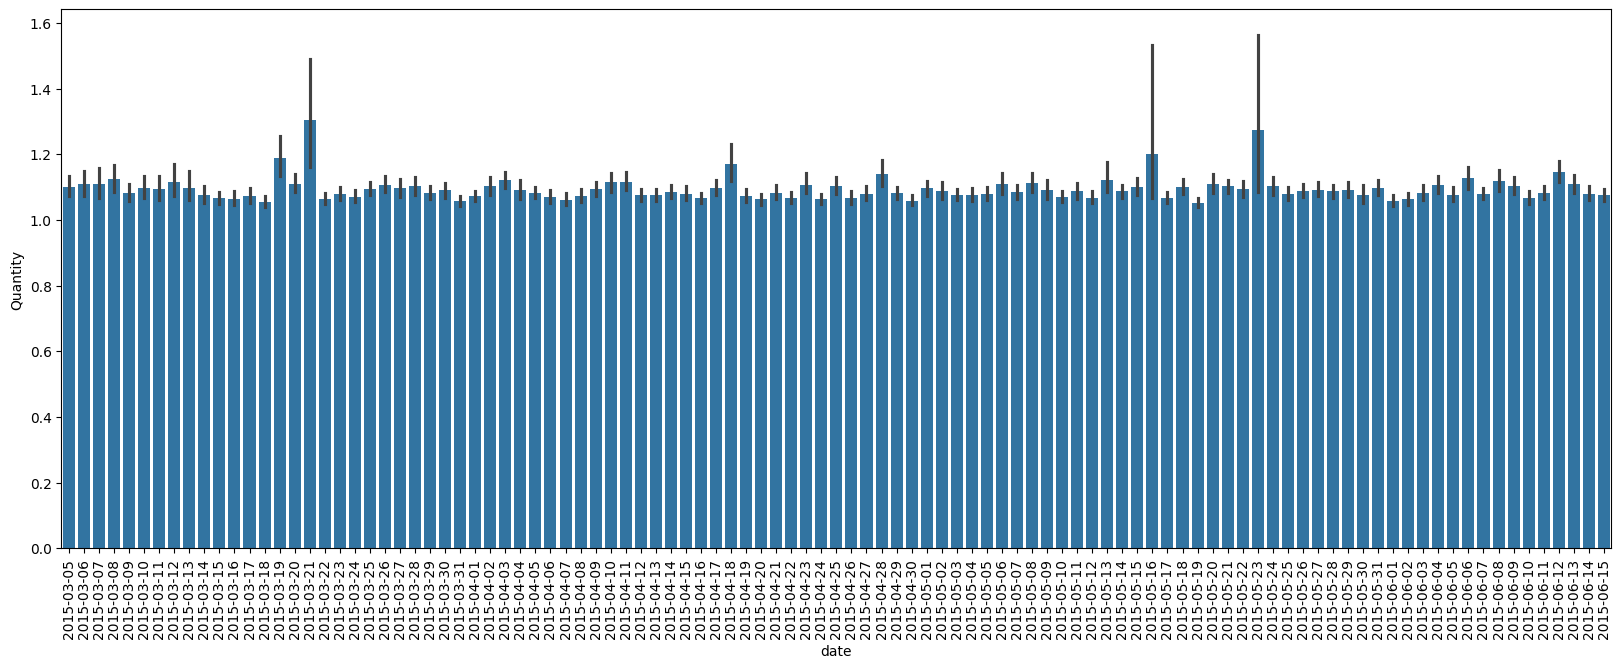

In [50]:
plt.figure(figsize=(20, 7))

ax = sns.barplot(data= df, x='date', y='Quantity')
    
plt.xticks(rotation=90, ha='center')

plt.show()

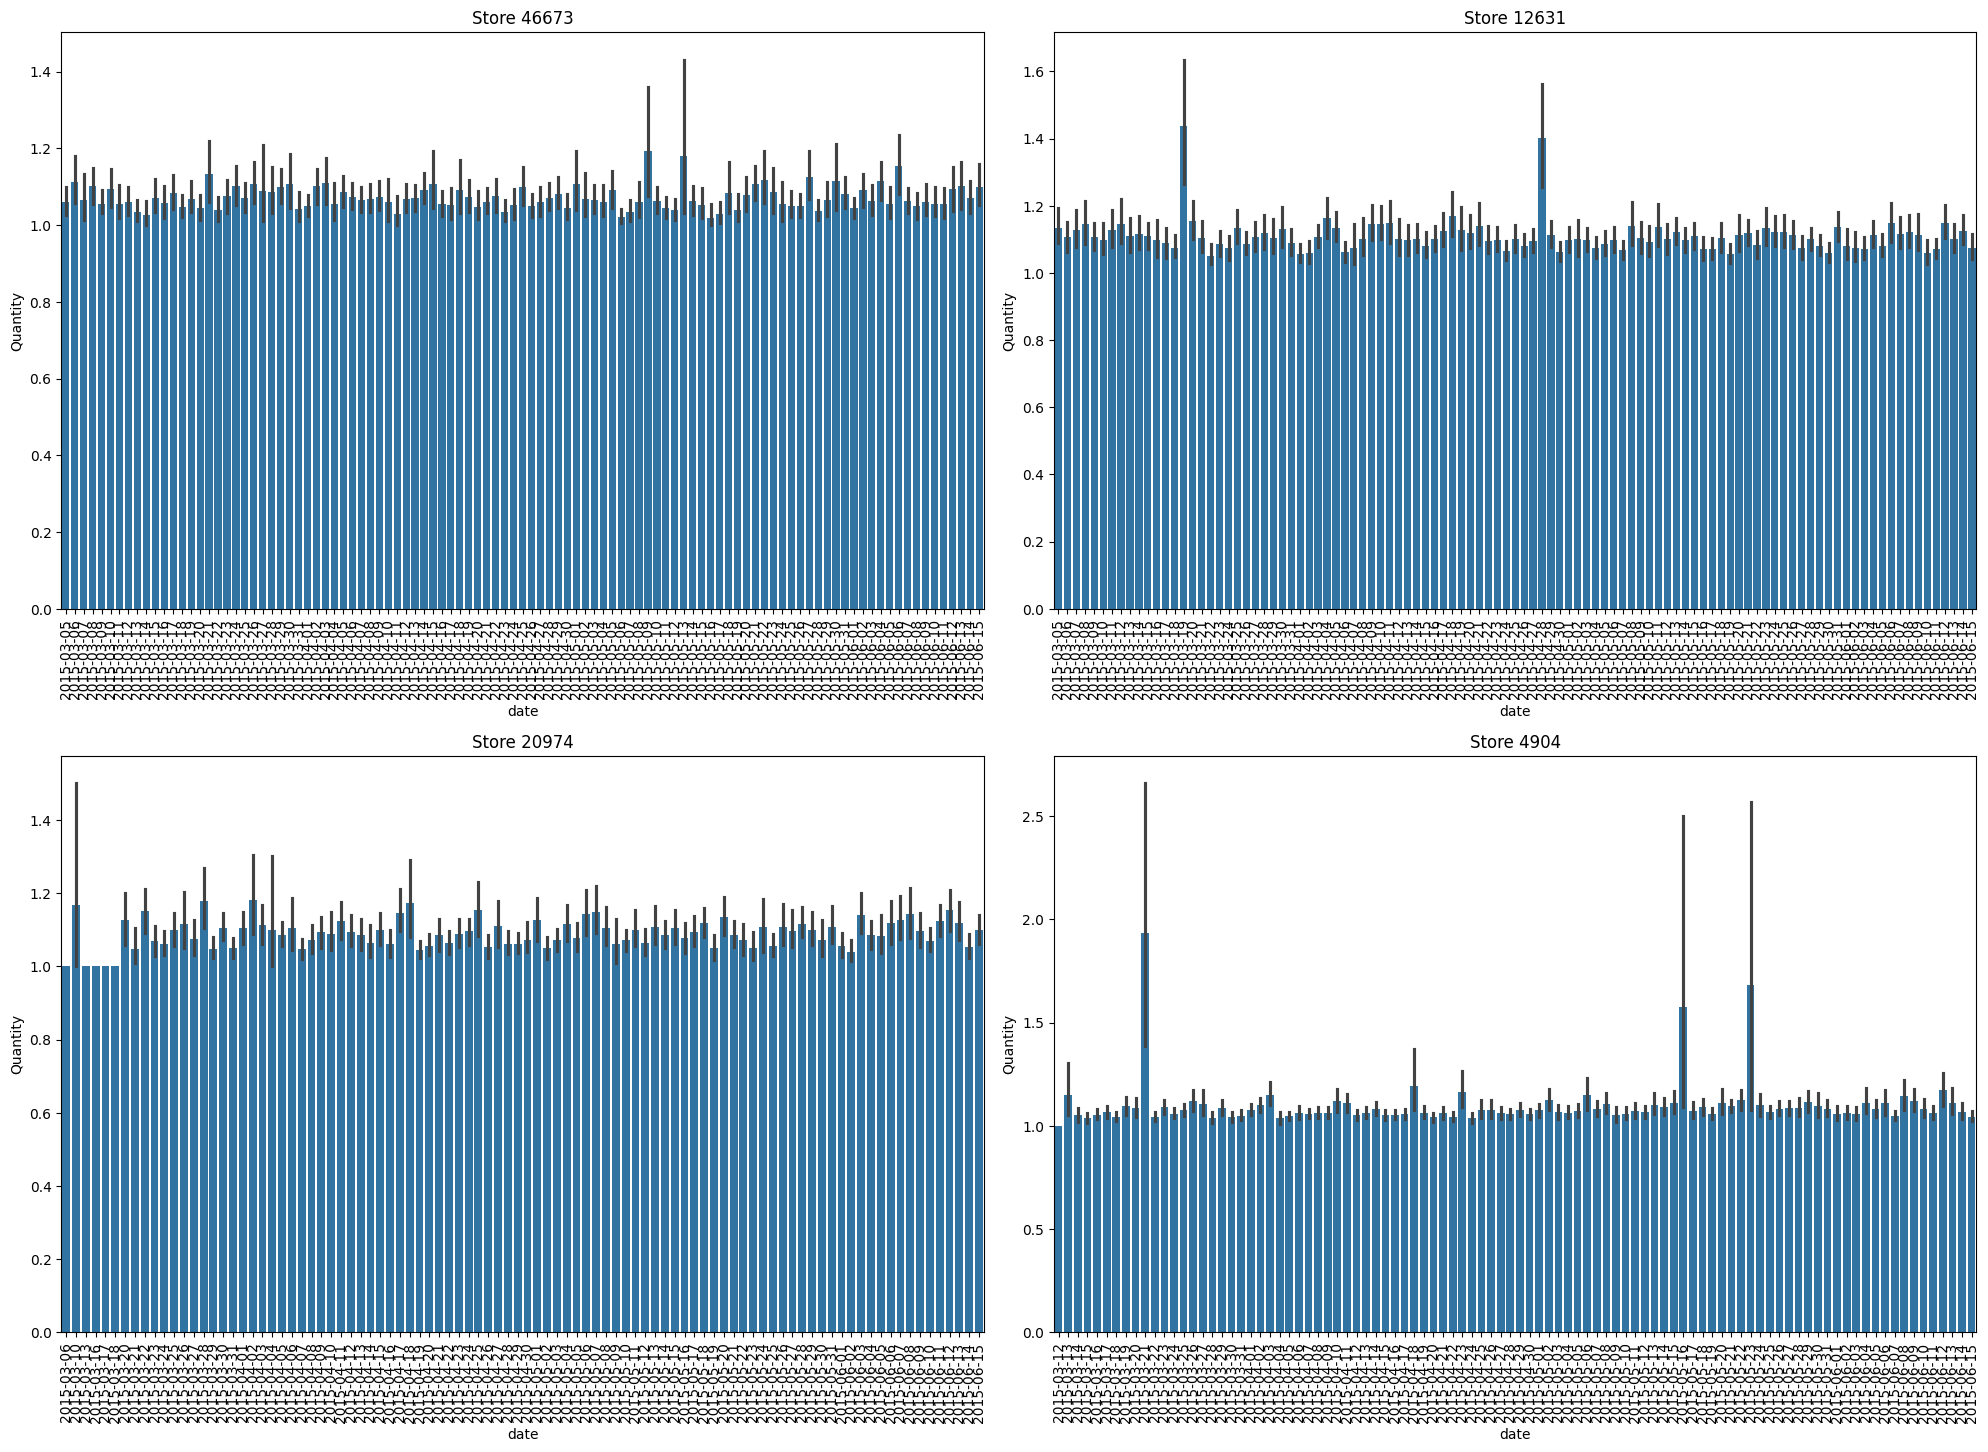

In [51]:
num_stores = df['StoreNumber'].unique()

plt.figure(figsize=(20, 7 * len(num_stores)))  # Sửa lỗi ở đây

for index, store in enumerate(df['StoreNumber'].unique(), start=1):
    plt.subplot(len(num_stores), 2, index)
    ax = sns.barplot(data=df[df['StoreNumber'] == store], x='date', y='Quantity')
    plt.xticks(rotation=90, ha='center')
    plt.title(f'Store {store}')

plt.tight_layout()
plt.show()

In [52]:
# Kiểm tra các đơn hàng có số lượng sản phẩm cao
df_quantity = outliers[outliers['Quantity']>= 40]

In [53]:
df_quantity.columns

Index(['MD5KEY_MENUITEM', 'MD5KEY_ORDERSALE', 'CategoryDescription',
       'DepartmentDescription', 'Description', 'StoreNumber', 'TaxAmount',
       'AdjustedPrice', 'DiscountAmount', 'Price', 'Quantity', 'PLU', 'Id',
       'date', 'SalesAmount', 'day_of_week'],
      dtype='object')

In [54]:
df_merged_quantity_order = pd.merge(df_quantity, df_order, on='MD5KEY_ORDERSALE', how="inner")

In [55]:
df_merged_quantity_order

,MD5KEY_MENUITEM,MD5KEY_ORDERSALE,CategoryDescription,DepartmentDescription,Description,StoreNumber_x,TaxAmount_x,AdjustedPrice,DiscountAmount,Price,...,SalesAmount,day_of_week,ChangeReceived,OrderNumber,TaxInclusiveAmount,TaxAmount_y,MealLocation,TransactionId,StoreNumber_y,date_y
0,7AFF6F9A39CC2CBBD33DFFFDF213DA88,B6BA5DC2E5670B796E57C435A64E8E60,Footlong,Footlong Sub,Turkey FtLong,4904,43.0312,506.25,0.00,6.75,...,506.25,Saturday,0.0,11491,0,43.23,0,11491,4904,2015-05-16
1,120875AC5766ED916C913794EA77BC50,68CBE43FC25B5EE67846D4489638732C,Footlong,Footlong Sub,Big Hot Pastrami FtLong,4904,29.0700,342.00,29.25,8.25,...,342.00,Saturday,0.0,12484,0,37.40,0,12495,4904,2015-05-23
2,CED03E3D17732D7A30CF169E574AC9F9,68CBE43FC25B5EE67846D4489638732C,Chips,Chips,Chips,4904,5.6100,66.00,6.00,1.20,...,66.00,Saturday,0.0,12484,0,37.40,0,12495,4904,2015-05-23


### Note: Khi phân tích báo cáo liên quan tới Quantity tách các giá trị ngoại lai để phân tích
Chú ý cửa hàng 4904

## Kiểm tra outliers price

In [56]:
# Tính Q1 (25th percentile) và Q3 (75th percentile)
Q1_Price = df['Price'].quantile(0.25)
Q3_Price = df['Price'].quantile(0.75)

# Tính IQR
IQR_Price = Q3_Price - Q1_Price

# Xác định giới hạn dưới và trên
lower_bound_Price = Q1_Price - 1.5 * IQR_Price
upper_bound_Price = Q3_Price + 1.5 * IQR_Price

# Xác định giá trị ngoại lai
outliers_Price = df[(df['Price'] < lower_bound_Price) | (df['Price'] > upper_bound_Price)]

print("Số hàng df:", df.shape[0])
print("Số hàng outliers:", outliers_Price.shape[0])
print("% outliers:", outliers_Price.shape[0]/df.shape[0]*100)
print("Tổng doanh thu:", df['SalesAmount'].sum())
print("Tổng doanh thu outliers:", outliers_Price['SalesAmount'].sum())
print("% doanh thu outliers:", outliers_Price['SalesAmount'].sum()/df['SalesAmount'].sum()*100)

Số hàng df: 91420
Số hàng outliers: 46
% outliers: 0.05031721723911616
Tổng doanh thu: 316778.81
Tổng doanh thu outliers: 1618.0
% doanh thu outliers: 0.5107664871902259


In [57]:
outliers_Price.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46 entries, 1343 to 91382
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   MD5KEY_MENUITEM        46 non-null     object        
 1   MD5KEY_ORDERSALE       46 non-null     object        
 2   CategoryDescription    46 non-null     object        
 3   DepartmentDescription  46 non-null     object        
 4   Description            46 non-null     object        
 5   StoreNumber            46 non-null     int64         
 6   TaxAmount              46 non-null     float64       
 7   AdjustedPrice          46 non-null     float64       
 8   DiscountAmount         46 non-null     float64       
 9   Price                  46 non-null     float64       
 10  Quantity               46 non-null     int64         
 11  PLU                    46 non-null     int64         
 12  Id                     46 non-null     int64         
 13  date  

In [58]:
outliers_Price[['CategoryDescription', 'DepartmentDescription', 'Description', 'StoreNumber']].head()

,CategoryDescription,DepartmentDescription,Description,StoreNumber
1343,Cash Card,Cash Card,Subway Cash Card Activate $25,46673
3095,Cash Card,Cash Card,Subway Cash Card Activate Any$,12631
7410,Catering,Sandwich Platter,Classic Combo SndPlt,46673
7826,Catering,Sandwich Platter,Flavor Craver SndPlt,46673
20266,Cash Card,Cash Card,Subway Cash Card Activate Any$,20974


### Note: Check sản phẩm thẻ mua hàng

In [59]:

print(outliers_Price['StoreNumber'].value_counts())
outliers_Price.groupby(['CategoryDescription',
                        'DepartmentDescription',
                        'Description',
                        'StoreNumber']).agg(TotalQuantity=('Quantity', 'sum')).reset_index()

StoreNumber
4904     28
46673     7
20974     6
12631     5
Name: count, dtype: int64


,CategoryDescription,DepartmentDescription,Description,StoreNumber,TotalQuantity
0,Cash Card,Cash Card,Subway Cash Card Activate $20,4904,2
1,Cash Card,Cash Card,Subway Cash Card Activate $25,4904,24
2,Cash Card,Cash Card,Subway Cash Card Activate $25,20974,1
3,Cash Card,Cash Card,Subway Cash Card Activate $25,46673,1
4,Cash Card,Cash Card,Subway Cash Card Activate $50,20974,1
5,Cash Card,Cash Card,Subway Cash Card Activate Any$,4904,2
6,Cash Card,Cash Card,Subway Cash Card Activate Any$,12631,3
7,Cash Card,Cash Card,Subway Cash Card Activate Any$,20974,4
8,Catering,Sandwich Platter,Classic Combo SndPlt,12631,1
9,Catering,Sandwich Platter,Classic Combo SndPlt,46673,5


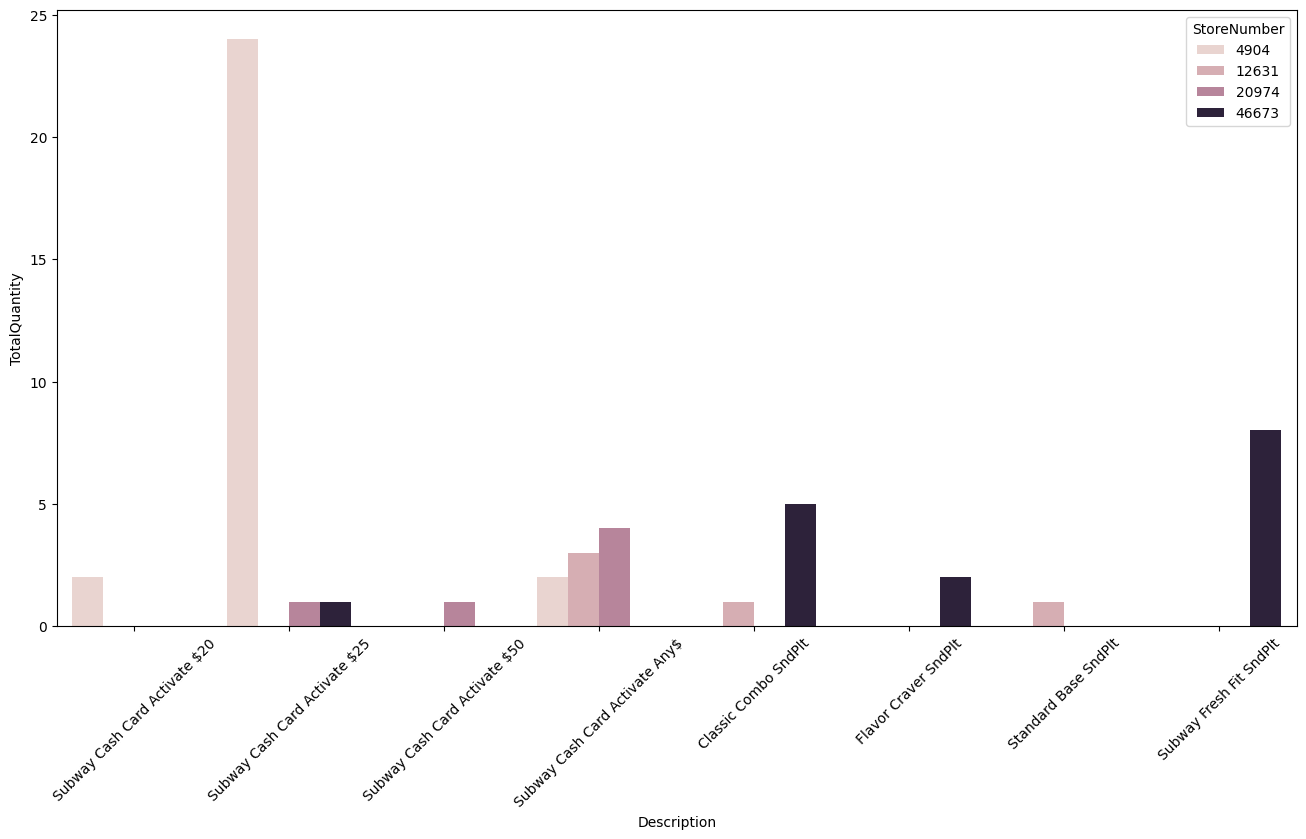

In [60]:
plt.figure(figsize=(16, 8))

sns.barplot(data=outliers_Price.groupby(['CategoryDescription',
                        'DepartmentDescription',
                        'Description',
                        'StoreNumber']).agg(
                          TotalQuantity=('Quantity', 'sum')
                        ).reset_index(),
            x='Description',
            y='TotalQuantity',
            hue='StoreNumber')

plt.xticks(rotation=45, ha='center')
plt.show()

In [61]:
df_store = pd.read_csv('/Users/sonnguyen/Dropbox/My Mac (Son’s MacBook Air)/Documents/1. Data Analytics/CoderSchool/FinalProject/data/processed/20240715/store_restaurant_20240715.csv')

In [62]:
df_store.head()

,STORE_ADDRESS1,STORE_ADDRESS2,DISTRIBUTION_REGION,STORE_STATE,STORE_CITY,STORE_ZIP,STORE_TYPE,STORE_LOYALTY_FLAG,STORE_NUMBER
0,Ninth Street,NaN,Western,California,Berkeley,94710,Traditional,N,46673
1,Shattuck Sq,Shop #6,Western,California,Berkeley,94704,Traditional,Y,4904
2,Myrtle Avenue,NaN,Northeast,New York,Ridgewood,11385,Traditional,Y,12631
3,Whitney Avenue,NaN,Northeast,New York,Elmhurst,11373,Traditional,Y,20974


In [63]:
outliers_Price_store = pd.merge(outliers_Price, df_store, left_on='StoreNumber', right_on='STORE_NUMBER', how='inner')

In [64]:
outliers_Price_store.head(5)

,MD5KEY_MENUITEM,MD5KEY_ORDERSALE,CategoryDescription,DepartmentDescription,Description,StoreNumber,TaxAmount,AdjustedPrice,DiscountAmount,Price,...,day_of_week,STORE_ADDRESS1,STORE_ADDRESS2,DISTRIBUTION_REGION,STORE_STATE,STORE_CITY,STORE_ZIP,STORE_TYPE,STORE_LOYALTY_FLAG,STORE_NUMBER
0,C5A2A5F1A9939E30FF084713BAA7381C,9C397080F72347426FAC6EB297B077A1,Cash Card,Cash Card,Subway Cash Card Activate $25,46673,0.0,25.0,0.0,25.0,...,Sunday,Ninth Street,NaN,Western,California,Berkeley,94710,Traditional,N,46673
1,E7DC1E576FA69068196CA9F5687D16C2,8E51ED8B3C48212BC8AB0EA3CE7C4F7B,Cash Card,Cash Card,Subway Cash Card Activate Any$,12631,0.0,30.0,0.0,30.0,...,Thursday,Myrtle Avenue,NaN,Northeast,New York,Ridgewood,11385,Traditional,Y,12631
2,1EDEEDAD8FEA8845095D2AE5E1BCD50C,35CC89B730B548B99CF4EC25F80E19AB,Catering,Sandwich Platter,Classic Combo SndPlt,46673,0.0,38.0,0.0,38.0,...,Thursday,Ninth Street,NaN,Western,California,Berkeley,94710,Traditional,N,46673
3,A8533BAFD348666C01B23AB11A8FA8D1,35CC89B730B548B99CF4EC25F80E19AB,Catering,Sandwich Platter,Flavor Craver SndPlt,46673,0.0,76.0,0.0,38.0,...,Thursday,Ninth Street,NaN,Western,California,Berkeley,94710,Traditional,N,46673
4,2F820394E5273CC76FF8A47016F76A46,889D0905DC89FF7E6E36990C6E0B41ED,Cash Card,Cash Card,Subway Cash Card Activate Any$,20974,0.0,15.0,0.0,15.0,...,Thursday,Whitney Avenue,NaN,Northeast,New York,Elmhurst,11373,Traditional,Y,20974


In [65]:
storeId = outliers_Price['StoreNumber'].value_counts()
outliers_Price_store.groupby(['StoreNumber',
                              'DISTRIBUTION_REGION',
                              'STORE_STATE',
                              'STORE_CITY']).agg(
                                TotalQuantity=('Quantity', 'sum'),
                                TotalSale=('SalesAmount', 'sum'))

,,,,TotalQuantity,TotalSale
StoreNumber,DISTRIBUTION_REGION,STORE_STATE,STORE_CITY,,
4904,Western,California,Berkeley,28,715.0
12631,Northeast,New York,Ridgewood,5,158.0
20974,Northeast,New York,Elmhurst,6,150.0
46673,Western,California,Berkeley,16,595.0


#### Note: Đa số các món có giá outlier nằm ở cửa hàng 4904, nhưng giá trị mang về của 46673 là cao nhất

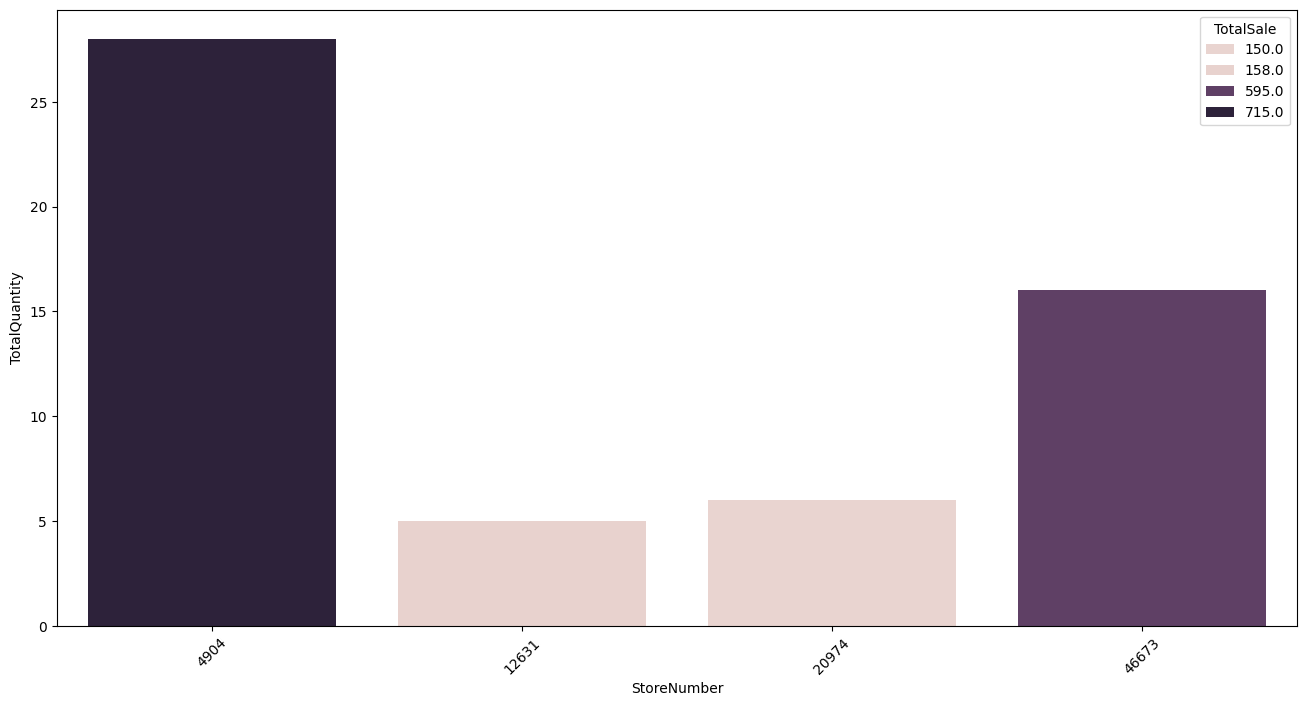

In [66]:
plt.figure(figsize=(16, 8))

sns.barplot(data=outliers_Price_store.groupby(['StoreNumber',
                              'DISTRIBUTION_REGION',
                              'STORE_STATE',
                              'STORE_CITY']).agg(
                                TotalQuantity=('Quantity', 'sum'),
                                TotalSale=('SalesAmount', 'sum')),
            x='StoreNumber',
            y='TotalQuantity',
            hue='TotalSale')

plt.xticks(rotation=45, ha='center')
plt.show()

## Check xem cash card trong đơn hàng

# 8. Lưu trữ file sau khi xử lý

In [67]:
# current_date = datetime.now().strftime("%Y%m%d")
# parent_dir = "../../../data/processed" 

# # Tạo đường dẫn đầy đủ cho thư mục mới
# new_folder_path = os.path.join(parent_dir, current_date)

# # Kiểm tra xem thư mục đã tồn tại chưa, nếu chưa thì tạo mới
# if not os.path.exists(new_folder_path):
#     os.makedirs(new_folder_path)
#     print(f"Thư mục '{new_folder_path}' đã được tạo thành công!")
# else:
#     print(f"Thư mục '{new_folder_path}' đã tồn tại.")

# df.to_csv(f'{new_folder_path}/2.menuitem_{current_date}.csv', index=False)